# 2. Fine Tunning

Setup links to data storage
```
# Link Model Checkpoints
!ln -s /var/models/3/space_apps_2024_seismic_detection/ ../models/remote
```

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).joinpath('..', 'src').resolve()))

In [3]:
import nasa_space_apps_challenge_2024_seismic_detection as seismic

/opt/conda/lib/python3.11/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `PYTORCH_PRETRAINED_BERT_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `PYTORCH_TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
import pandas as pd
from pprint import pprint
import random

## Parameters

In [5]:
input_row_path = '../data/raw/remote'
input_processed_path = '../data/interim/remote/dataset'
output_path = '../data/interim/remote'
output_models_path = '../models/remote/'

random_state = 42

## TKTK: Simple algorithms

## Foundation models

### MOMENT (Salesforce)

#### Fine Tune classification head

In [6]:
segment_size = 16 * 1024
batch_size = 16  # Adjust batch size based on your system's capability
init_lr = 0.02
epochs = 100
random.seed(random_state)

# Prepare the file list and dataset
file_list = seismic.list_records(input_processed_path)

# TKTK: we should take care about different sub-groups (as stations, or space-bodies), but for simplicity just ignore it for the moment
file_list_train, file_list_test = train_test_split(file_list, test_size=10, random_state=random_state, shuffle=True)

train_seismic_dataset = seismic.dataset.SeismicDataset(file_list_train, input_processed_path, segment_size)
test_seismic_dataset = seismic.dataset.SeismicDataset(file_list_test, input_processed_path, segment_size,
                                                      segment_scan_step=4*1024,
                                                      random_segment=False)

train_data_loader = DataLoader(train_seismic_dataset, batch_size=batch_size, shuffle=True)
test_data_loader = seismic.MiniBatchGenerator(
    DataLoader(test_seismic_dataset, batch_size=1, shuffle=False, collate_fn=seismic.variable_length_batches_collate_fn),
    batch_size,
)

trainer = seismic.MomentTrainer(
    train_data_loader,
    test_data_loader,
    epochs=epochs,
    mode='linear_probing',
    output_path=os.path.join(output_models_path, 'moment-fine-tuned-classification-layer'),
    # mode='full_finetuning',
)

In [7]:
%%time
performance = trainer.train()

Epoch 1/100


100%|██████████| 4/4 [00:11<00:00,  2.89s/it]


Train loss:  0.6932576447725296


10it [00:04,  2.06it/s]


val loss: 0.24753534155232565, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 2/100


100%|██████████| 4/4 [00:11<00:00,  2.84s/it]


Train loss:  0.6887613981962204


 36%|███▌      | 10/28 [00:04<00:08,  2.05it/s]


val loss: 0.24746558921677725, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 3/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6885538697242737


 36%|███▌      | 10/28 [00:04<00:08,  2.05it/s]


val loss: 0.24714006909302302, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 4/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6940022855997086


 36%|███▌      | 10/28 [00:04<00:08,  2.05it/s]


val loss: 0.24711681263787405, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 5/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6919311583042145


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24714006696428573, val accuracy: 0.5714285714285714
Epoch 6/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6920369416475296


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24707031462873733, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 7/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6891560852527618


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24697730583803995, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 8/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6908162385225296


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24714006696428573, val accuracy: 0.5714285714285714
Epoch 9/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6795328706502914


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24676804457392013, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 10/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6867757141590118


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24702380810465133, val accuracy: 0.5714285714285714
Epoch 11/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6837239563465118


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24683779690946853, val accuracy: 0.5714285714285714
Epoch 12/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6896769255399704


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24676804457392013, val accuracy: 0.5714285714285714
Epoch 13/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6694742888212204


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24667503578322275, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 14/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6802327483892441


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24614025439534867, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 15/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6901529878377914


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24616350446428573, val accuracy: 0.5714285714285714
Epoch 16/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6785725951194763


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24625650899750845, val accuracy: 0.5714285714285714
Epoch 17/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6736002564430237


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24641926799501693, val accuracy: 0.5714285714285714
Epoch 18/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6695434600114822


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24609375, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 19/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6807902008295059


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24607049993106297, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 20/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6580810546875


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24623325892857142, val accuracy: 0.5714285714285714
Epoch 21/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6672729551792145


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24646577664784022, val accuracy: 0.5714285714285714
Epoch 22/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6592732816934586


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24611700219767435, val accuracy: 0.5714285714285714
Epoch 23/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6937703490257263


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24623325892857142, val accuracy: 0.5714285714285714
Epoch 24/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6537312865257263


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24609375212873733, val accuracy: 0.5714285714285714
Epoch 25/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6674316376447678


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24658203125, val accuracy: 0.5714285714285714
Epoch 26/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6711100190877914


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24651227678571427, val accuracy: 0.5714285714285714
Epoch 27/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6690958589315414


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24674478811877115, val accuracy: 0.5714285714285714
Epoch 28/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6476888060569763


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24674479237624578, val accuracy: 0.5714285714285714
Epoch 29/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6693196594715118


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24686104910714285, val accuracy: 0.5714285714285714
Epoch 30/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6612182557582855


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24730282809053147, val accuracy: 0.5714285714285714
Epoch 31/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6904235780239105


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24683780116694315, val accuracy: 0.5714285714285714
Epoch 32/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6602803617715836


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24625651112624578, val accuracy: 0.5714285714285714
Epoch 33/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6387105286121368


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.247023805975914, val accuracy: 0.5714285714285714
Epoch 34/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6746887266635895


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24623325892857142, val accuracy: 0.5714285714285714
Epoch 35/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6604675352573395


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24604724986212595, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 36/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6475301086902618


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24676804031644547, val accuracy: 0.5714285714285714
Epoch 37/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6693949401378632


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24790736607142858, val accuracy: 0.5714285714285714
Epoch 38/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6202148497104645


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24727957802159445, val accuracy: 0.5714285714285714
Epoch 39/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.5958597809076309


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24795386833803995, val accuracy: 0.5714285714285714
Epoch 40/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6899841278791428


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24807012719767435, val accuracy: 0.5714285714285714
Epoch 41/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6443155854940414


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24941871421677725, val accuracy: 0.5714285714285714
Epoch 42/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6495808959007263


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24807012506893703, val accuracy: 0.5714285714285714
Epoch 43/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6742207854986191


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24874441964285715, val accuracy: 0.5714285714285714
Epoch 44/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.682586669921875


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24834914292607987, val accuracy: 0.5714285714285714
Epoch 45/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6397827118635178


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24841889951910293, val accuracy: 0.5714285714285714
Epoch 46/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6987976133823395


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24748883928571427, val accuracy: 0.5714285714285714
Epoch 47/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6744974702596664


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24683779903820582, val accuracy: 0.5714285714285714
Epoch 48/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6591756194829941


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24727957589285715, val accuracy: 0.5714285714285714
Epoch 49/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6827331483364105


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.2454194575548172, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 50/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6087422668933868


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24665178784302302, val accuracy: 0.5714285714285714
Epoch 51/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6567321717739105


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24495442637375422, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 52/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6491923034191132


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24579148207392013, val accuracy: 0.5714285714285714
Epoch 53/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6498331725597382


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24544270975249155, val accuracy: 0.5714285714285714
Epoch 54/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6395833343267441


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24679129038538253, val accuracy: 0.5714285714285714
Epoch 55/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6894571930170059


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24627975906644547, val accuracy: 0.5714285714285714
Epoch 56/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.7016927152872086


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24618675666196005, val accuracy: 0.5714285714285714
Epoch 57/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6683675199747086


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24555896435465133, val accuracy: 0.5714285714285714
Epoch 58/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.670989990234375


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24641927012375422, val accuracy: 0.5714285714285714
Epoch 59/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.7059610933065414


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24504743303571427, val accuracy: 0.5714285714285714
Epoch 60/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6650126129388809


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24565197101661138, val accuracy: 0.5714285714285714
Epoch 61/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.7167846709489822


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24362909368106297, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 62/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6610168516635895


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24358258715697698, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 63/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6922770142555237


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24288504251411983, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 64/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6641276031732559


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.2421875, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 65/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6754821836948395


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24195498653820582, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 66/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6753011047840118


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.2451869398355484, val accuracy: 0.5714285714285714
Epoch 67/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6844746917486191


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24209449333803995, val accuracy: 0.5714285714285714
Epoch 68/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6460550874471664


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24153645762375422, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 69/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.7118041962385178


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24293154690946853, val accuracy: 0.5714285714285714
Epoch 70/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6226623505353928


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24265252905232565, val accuracy: 0.5714285714285714
Epoch 71/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6465738862752914


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24409412060465133, val accuracy: 0.5714285714285714
Epoch 72/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6870483458042145


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24386160714285715, val accuracy: 0.5714285714285714
Epoch 73/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6620564758777618


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24148995535714285, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 74/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6764668822288513


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24376860048089707, val accuracy: 0.5714285714285714
Epoch 75/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6485229432582855


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24158296201910293, val accuracy: 0.5714285714285714
Epoch 76/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6364725679159164


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24190848214285715, val accuracy: 0.5714285714285714
Epoch 77/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6508158296346664


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.2418852299451828, val accuracy: 0.5714285714285714
Epoch 78/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6381449401378632


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24248977218355453, val accuracy: 0.5714285714285714
Epoch 79/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6439270079135895


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24404761833803995, val accuracy: 0.5714285714285714
Epoch 80/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6525960266590118


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24204799107142858, val accuracy: 0.5714285714285714
Epoch 81/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6562438905239105


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24272228564534867, val accuracy: 0.5714285714285714
Epoch 82/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6753011047840118


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24367559381893703, val accuracy: 0.5714285714285714
Epoch 83/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6560913026332855


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24293154690946853, val accuracy: 0.5714285714285714
Epoch 84/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6446024626493454


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24197823873588017, val accuracy: 0.5714285714285714
Epoch 85/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6895833313465118


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24237351332392013, val accuracy: 0.5714285714285714
Epoch 86/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6763346344232559


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24258277245930263, val accuracy: 0.5714285714285714
Epoch 87/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6477620452642441


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.2425595223903656, val accuracy: 0.5714285714285714
Epoch 88/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6779398620128632


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24160621421677725, val accuracy: 0.5714285714285714
Epoch 89/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6385640501976013


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24100167623588017, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 90/100


100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


Train loss:  0.6867146790027618


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24123418756893703, val accuracy: 0.5714285714285714
Epoch 91/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6541992127895355


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24146670528820582, val accuracy: 0.5714285714285714
Epoch 92/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6638102233409882


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24065290178571427, val accuracy: 0.5714285714285714
Saving best model
Model saved at  ../models/remote/moment-fine-tuned-classification-layer
Epoch 93/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6427652984857559


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.2428617924451828, val accuracy: 0.5714285714285714
Epoch 94/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6886494904756546


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24172247094767435, val accuracy: 0.5714285714285714
Epoch 95/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6851053833961487


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24265253118106297, val accuracy: 0.5714285714285714
Epoch 96/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6733500212430954


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24276878791196005, val accuracy: 0.5714285714285714
Epoch 97/100


100%|██████████| 4/4 [00:11<00:00,  2.87s/it]


Train loss:  0.679290771484375


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24081566291196005, val accuracy: 0.5714285714285714
Epoch 98/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6240742951631546


 36%|███▌      | 10/28 [00:04<00:08,  2.03it/s]


val loss: 0.24430338825498307, val accuracy: 0.5714285714285714
Epoch 99/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6521586030721664


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]


val loss: 0.24067615398338862, val accuracy: 0.5714285714285714
Epoch 100/100


100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


Train loss:  0.6517964750528336


 36%|███▌      | 10/28 [00:04<00:08,  2.04it/s]

val loss: 0.24346633042607987, val accuracy: 0.5714285714285714
CPU times: user 23min 46s, sys: 4min 18s, total: 28min 5s
Wall time: 29min 47s


<Axes: xlabel='epoch'>

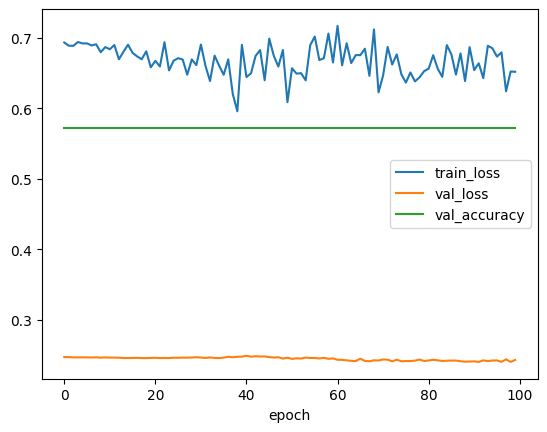

In [8]:
performance_df = pd.DataFrame(performance)
performance_df.set_index('epoch').plot()

In [9]:
torch.cuda.empty_cache()

#### Fine Tune All Layers (DISABLED BEFORE SUBMISSION)

segment_size = 16 * 1024
batch_size = 1 # Adjust batch size based on your system's capability
init_lr = 0.02
epochs = 1
random.seed(random_state)

# Prepare the file list and dataset
file_list = seismic.list_records(input_processed_path)

# TKTK: we should take care about different sub-groups (as stations, or space-bodies), but for simplicity just ignore it for the moment
file_list_train, file_list_test = train_test_split(file_list, test_size=10, random_state=random_state, shuffle=True)

train_seismic_dataset = seismic.dataset.SeismicDataset(file_list_train, input_processed_path, segment_size)
test_seismic_dataset = seismic.dataset.SeismicDataset(file_list_test, input_processed_path, segment_size)

train_data_loader = DataLoader(train_seismic_dataset, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_seismic_dataset, batch_size=batch_size, shuffle=False, collate_fn=seismic.variable_length_batches_collate_fn)

trainer = seismic.MomentTrainer(
    train_data_loader,
    test_data_loader,
    epochs=epochs,
    mode='full_finetuning',
    lora=True,
)

%%time
performance = trainer.train()
trainer.save_checkpoint(os.path.join(output_models_path, 'moment-fine-tuned-all-layers-lora'))
torch.cuda.empty_cache()

performance_df = pd.DataFrame(performance)
performance_df.set_index('epoch').plot()

## Inference

model = trainer.model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

segment_size = 16 * 1024
batch_size = 16  # Adjust batch size based on your system's capability

# Prepare the file list and dataset
file_list = seismic.list_records(input_processed_path)

seismic_dataset = seismic.dataset.SeismicDataset(file_list, input_processed_path, segment_size)
data_loader = DataLoader(seismic_dataset, batch_size=batch_size, shuffle=True)

# # Iterate through the DataLoader and pass batches to the model
for batch_x, batch_labels in data_loader:
    batch_x = batch_x.to(device)
    output = model(x_enc=batch_x)
    predicted_label_idx = output.logits.argmax(dim=1).cpu()

    # Process each prediction in the batch
    for i in range(len(batch_labels)):
        predicted_label = seismic.category_id_to_name[predicted_label_idx[i].item()]
        original_label = batch_labels[i]
        # print(f'Predicted: {predicted_label}')
        # print(f'Original: {seismic.category_id_to_name[original_label.item()]}')
        print(f'{seismic.category_id_to_name[original_label.item()]} / {predicted_label}')
        probabilities = torch.sigmoid(output.logits[i]).cpu().tolist()
        print(f'Probabilities: {probabilities}')
        print()